<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-scf196/blob/main/kapitza_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Psuedocode

1. **Import modules:** `numpy` for mathematical functions, `matplotlib.pyplot` for plotting, `solve_ivp` for solving ODE

2. **Define ODE:**
$$ \theta'' + 2 \zeta \theta' + (\epsilon^2 - \alpha\cos\tau)\sin(\theta) = 0$$

putting this in the form needed by `solve_ivp`:

$$ \theta'' = - 2 \zeta \theta' - (\epsilon^2 - \alpha\cos\tau)\sin(\theta)$$

note that $f' = \frac{df}{d\tau}$ with $\tau=\omega_d t$, a dimensionless time

3. **Define utilities:** `basic_plot` for basic plotting, `alpha_critical` to show the stability of the inverted state, `alpha_max` to show the upper stability trend, `alpha_min` to show the lower stability trend


4. **Solve ODE:** Solve ODE using `solve_ivp` and show stability trend using `matplotlib.pyplot` and `np.cos`

5. **Extract mesh:** Use lists of alpha & epsilon values to make a mesh showing stability, and plot a function of epsilon showing stable alpha values

### **Import modules**

In [32]:
# import modules
import numpy as np # mathematical functions
import matplotlib.pyplot as plt # plotting
from scipy.integrate import solve_ivp # solving ode

### **Define ODE**
`pivot_driven_pendulum`, defined using $ \theta'' = - 2 \zeta \theta' - (\epsilon^2 - \alpha\cos\tau)\sin(\theta) $

In [33]:
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta): # define the motion
  """
  Defines the motion of a pivot driven pendulum.
  PARAMETERS
  tau : float, ndarray
    dimensionless time : tau = omega_d*t
  y : ndarray
    state variables [theta, ang_vel]
  epsilon : float
    dimensionless frequency
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  zeta : float, optional
    dimensionless damping coefficient
  RETURNS:
  dy_dtau : ndarray
    state variable derivatives
  """
  theta, ang_vel = y # unpack state variable
  dtheta_dtau = ang_vel # define the angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau)) * np.sin(theta) # equation of motion
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

### **Define utilities**

1. **`basic_plot`:** basic function for plotting
2. **`alpha_critical`:** guess for the boundary of the inverted state. parameters are `epsilon`, `zeta`, `coef`; returns `alpha`.
3. **`alpha_max`:** upper boundary of the inverted state
4. **`alpha_min`:** lower boundary of the inverted state

In [34]:
# define utilities

# basic plot
def basic_plot(t, y, xlabel=None, ylabel=None, figsize=(3, 3)):
  """
  Allows for basic plotting.
  PARAMETERS:
  t : ndarray
    time
  y : ndarray
    data
  xlabel : str, optional
    label for the x-axis
  ylabel : str, optional
    label for the y-axis
  figsize : tuple, optional
    size of the figure
  RETURNS:
  plt.show() : matplotlib.pyplot.show
    plot of x and y
  """
  plt.figure(figsize=figsize)
  plt.plot(t, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

# alpha_critical
def alpha_critical(epsilon, zeta, coef):
  """
  PARAMETERS:
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  zeta : float
    dimensionless damping coefficient
  coef : float
  tuning parameter to help with fit
  RETURNS:
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  """
  alpha = coef*epsilon # linear trendline cutting through range of stability
  return alpha

# alpha_max
def alpha_max(epsilon, zeta, coef):
  """
  PARAMETERS:
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  zeta : float
    dimensionless damping coefficient
  coef : float
  tuning parameter to help with fit
  RETURNS:
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  """
  alpha = epsilon**coef # upper boundary, exponential
  return alpha

# alpha_min
def alpha_min(epsilon, zeta, coef):
  """
  PARAMETERS:
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  zeta : float
    dimensionless damping coefficient
  coef : float
  tuning parameter to help with fit
  RETURNS:
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  """
  alpha = coef*epsilon # lower boundary, linear
  return alpha

### **Solve ODE**
ODE is solved inside function defining the long timescale response of the pendulum in the inverted state, `average_long_timescale_response`, which outputs the average cosine of the list of theta values given by `solve_ivp`

<cos(theta)> =  -0.9999999999999784


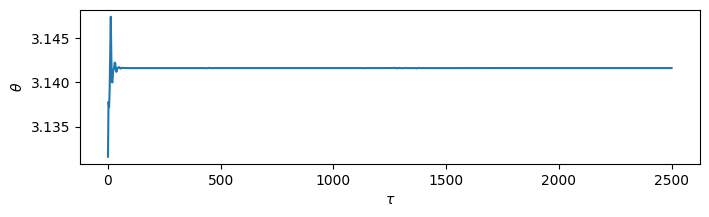

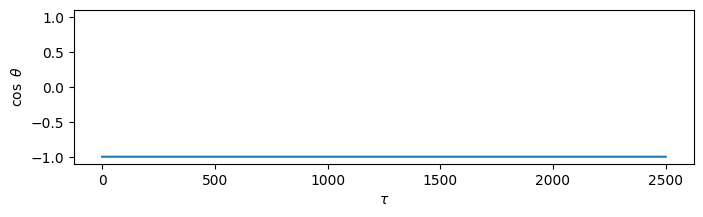

In [35]:
def average_long_timescale_response(epsilon, alpha, zeta, n_decay=100, delta_theta=0.01):
  """
  This function calculates the long timescale response of a pivot driven pendulum.
  PARAMETERS:
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  zeta : float
    dimensionless damping coefficient
  n_decay : int
    number of decay times we want to integrate over
  delta_theta : float
    deviation of theta from pi/inverted state
  RETURNS:
  cos_theta_averaging : float
    average cosine of calculated theta values
  solution : scipy.integrate.OdeSolution
    solution of the ODE
  """

  # define span of tau
  tau_min = 0
  tau_max = n_decay/(2*zeta)
  tau_span = [tau_min, tau_max]

  # define an initial state
  theta_0 = np.pi - delta_theta # small deviation from np.pi, inverted state
  ang_vel_0 = 0 # no initial kick off
  y_0 = [theta_0, ang_vel_0]

  # solve equation of motion
  solution = solve_ivp(pivot_driven_pendulum,
                      tau_span,
                      y_0,
                      args=(epsilon, alpha, zeta),
                      method='Radau',
                      dense_output=True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace((n_decay-1)/(2*zeta), tau_max, 1000)
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range)[0]))

  # plot theta
  tau_plot = np.linspace(tau_min, tau_max, 1000)
  theta_plot = solution.sol(tau_plot)[0]

  return cos_theta_averaging, solution

# test `average_long_timescale_response`

# input parameters
epsilon = 0.2 # dimensionless angular frequency
alpha = 0.5 # dimensionless drive strength
# values for epsilon and alpha fall within stable conditions, plots below show stability
zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over
n_decay = 500
delta_theta = 0.01 # deviation of theta from pi/inverted state

cos_theta_averaging, solution = average_long_timescale_response(epsilon, alpha, zeta, n_decay=n_decay)

# print averaged long time scale response
print('<cos(theta)> = ', cos_theta_averaging)

# plot dynamics
# define tau/theta meshes
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, theta_plot)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
plt.show()

# plot cos(theta)
plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos(theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\cos \ \theta$')
plt.ylim(-1.1, 1.1)
plt.show()

### **Extract mesh**
Define lists for epsilon and alpha, then make a mesh of average cosines using a for loop & plot with `alpha_critical`, `alpha_max`, and `alpha_min`

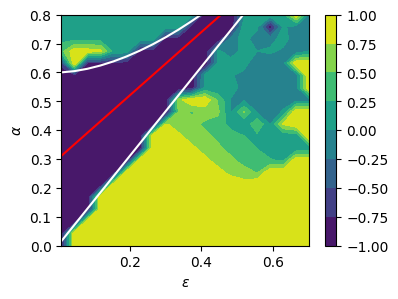

CPU times: user 7min 17s, sys: 332 ms, total: 7min 17s
Wall time: 7min 20s


In [36]:
%%time

# input parameters
epsilon_list = np.linspace(0.01, 0.7, 20) # dimensionless angular frequency, values <1
alpha_list = np.linspace(0, 0.8, 20) # dimensionless drive strength, values <1
zeta = 0.1 # dimensionless damping, small

# number of decay times we want to integrate over
n_decay = 500

# initialize our mesh for the average long time scale response
cos_theta_mesh = np.zeros((len(alpha_list), len(epsilon_list)))

# loop over epsilon and alpha
for i, alpha in enumerate(alpha_list):
  for j, epsilon in enumerate(epsilon_list):
    cos_theta_averaging, solution = average_long_timescale_response(epsilon, alpha, zeta, n_decay=n_decay)
    cos_theta_mesh[i,j] = cos_theta_averaging

# plot contour of output
plt.figure(figsize=(4,3))
plt.contourf(epsilon_list, alpha_list, cos_theta_mesh)
plt.plot(epsilon_list, alpha_critical(epsilon_list, zeta, 1.1) + 0.3, 'r')
plt.plot(epsilon_list, alpha_max(epsilon_list, zeta, 1.75) + 0.6, 'w')
plt.plot(epsilon_list, alpha_min(epsilon_list, zeta, 1.55), 'w')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.ylim(0, np.max(alpha_list))
plt.colorbar()
plt.show()

## **Takeaways**

- Takes an excessive amount of time to calculate a more precise mesh (2 hours and 10 minutes for 50 points each over 1000 decay times)
- Stable alpha values form an area rather than a line, fits well into two different functions rather than with one line of best fit
- More stable (cos(theta) = -1, meaning theta stays at pi) when alpha > epsilon (larger drive strength than angular frequency)